In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy
import scipy.stats

In [2]:
worpen_db = open('worpen.txt', 'r')
worpen = worpen_db.readlines()

aantal_worpen = 0
for iworp, worp in enumerate(worpen):
    if worp != '\n':
        aantal_worpen += 1

alle_worpen = np.zeros((aantal_worpen, 5))
for iworp, worp in enumerate(worpen):
    if worp != '\n':
        ogen = np.array([oog.rstrip('\n') for oog in worp.split(';')])
        alle_worpen[iworp, :] = ogen
        
# kunstmatige_worpen = np.random.randint(low=1, high=7, size=alle_worpen.shape)3

In [3]:
def combinatie_check(ogen):
    assert len(ogen) == 5
    ogen = list(ogen)
    combinatie = None
    if len(np.unique(ogen)) == 1:
        combinatie = 'yahtzee' 
    elif len(np.unique(ogen)) == 2:
        for oog in ogen:
            if ogen.count(oog) == 4:
                combinatie = 'carre'
            elif ogen.count(oog) == 3: # of 2
                combinatie = 'full house'
    elif len(np.unique(ogen)) == 5:
        if 1 not in ogen or 6 not in ogen:
             combinatie = 'grote straat'
    if combinatie is None:
        for oog in ogen:
            teller = 1
            while teller < 4:
                if oog + teller in ogen:
                    teller += 1
                else:
                    break
            if teller == 4:
                combinatie = 'kleine straat'
    if combinatie is None:
        for oog in ogen:
            if ogen.count(oog) == 3:
                combinatie = 'three of a kind'
    if combinatie is None:
        combinatie = 'brandhout'

    return combinatie

combinatie_kansen = {'yahtzee': 6/7776,
                     'carre': 150/7776, # http://datagenetics.com/blog/january42012/index.html
                     'three of a kind': 1200/7776,
                     'full house': 300/7776,
                     'grote straat': 240/7776,
                     'kleine straat': 960/7776}  # google
tmp = 0
for c, p in combinatie_kansen.items():
    tmp += p
combinatie_kansen['brandhout'] = 1 - tmp
print(combinatie_kansen)

{'yahtzee': 0.0007716049382716049, 'carre': 0.019290123456790122, 'three of a kind': 0.15432098765432098, 'full house': 0.038580246913580245, 'grote straat': 0.030864197530864196, 'kleine straat': 0.12345679012345678, 'brandhout': 0.6327160493827161}


In [4]:
def bin_toets(N, k, p):
    z = ((k - N*p - 0.0) / np.sqrt(N*(1-p)*p))
    P = scipy.stats.norm.sf(abs(z)) * 2 # two-sided tail
#     print(z, P)
    return z, P
    

In [5]:
combinaties = ['yahtzee', 'carre', 'full house', 'grote straat', 'kleine straat', 'three of a kind',
               'brandhout']
teller_combinaties_arr = np.zeros(len(combinaties))
for ii in range(alle_worpen.shape[0]):
#     print([int(oog) for oog in alle_worpen[ii, :]], combinatie_check(alle_worpen[ii, :]))
    teller_combinaties_arr[combinaties.index(combinatie_check(alle_worpen[ii, :]))] += 1

n_stenen = alle_worpen.size
# teller_ogen_dict = {}
teller_ogen_arr = np.zeros(6)
for i in range(1, 7):
#     teller_ogen_dict[i] = np.sum(alle_worpen == i)
    teller_ogen_arr[i-1] = np.sum(alle_worpen == i)
    z, P = bin_toets(N=n_stenen, k=teller_ogen_arr[i-1], p=1/6)
#     print(f'Aantal ogen: {i}, z waarde: {z}), P: {P}')
        


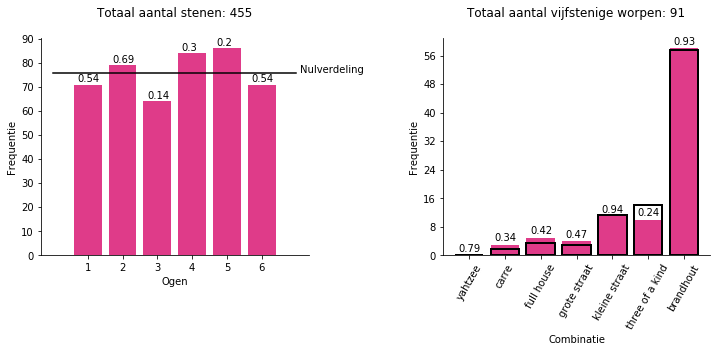

In [12]:

plt.rcParams['figure.figsize'] = (12, 4)
plt.subplots_adjust(wspace=0.5)

ax1 = plt.subplot(121)
ax1.plot([0, 7], [n_stenen / 6, n_stenen/6], c='black')
ax1.bar(x=np.arange(1, 7), height=teller_ogen_arr, color='#D80A6C', alpha=0.8)
plt.xticks(np.arange(1, 7)); plt.xlabel('Ogen');
plt.ylabel('Frequentie'); plt.title(f'Totaal aantal stenen: {n_stenen}\n');
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.text(s='Nulverdeling', x=7.1, y=(n_stenen/6));
for i, v in enumerate(teller_ogen_arr):
    ax1.text(i+.7, v+1, str(np.round(bin_toets(N=n_stenen, k=v, p=1/6)[1], 2)))

ax2 = plt.subplot(122)
ax2.bar(x=combinaties, height=teller_combinaties_arr, color='#D80A6C', alpha=0.8)
ax2.bar(x=combinaties, height=[combinatie_kansen[c]*aantal_worpen for c in combinaties], 
        fill=False, linewidth=2, edgecolor='k')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticklabels(labels=combinaties, rotation=60);
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Frequentie'); plt.xlabel('Combinatie');
plt.title(f'Totaal aantal vijfstenige worpen: {alle_worpen.shape[0]}\n');
for c, v in enumerate(teller_combinaties_arr):
    comb = combinaties[c]
    ax2.text(c-0.3, v+1, str(np.round(bin_toets(N=aantal_worpen, k=v, p=combinatie_kansen[comb])[1], 2)))